In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import torch
matplotlib.rc("font", family="MS Gothic")

In [2]:
df = pd.read_csv("population.csv", parse_dates=[0], index_col=0)

In [3]:
df1 = pd.DataFrame()
df1['渋谷'] = df['渋谷'][305:]
df2 = pd.DataFrame()
df2['新宿'] = df['新宿'][305:]
df3 = pd.DataFrame()
df3['丸の内'] = df['丸の内'][305:]
df4 = pd.DataFrame()
df4['品川'] = df['品川'][305:]
df5 = pd.DataFrame()
df5['下北沢'] = df['下北沢'][305:]
df6 = pd.DataFrame()
df6['八王子'] = df['八王子'][305:]
df7 = pd.DataFrame()
df7['大阪難波'] = df['大阪難波'][305:]
df8 = pd.DataFrame()
df8['札幌大通'] = df['札幌大通'][305:]
df9 = pd.DataFrame()
df9['仙台駅'] = df['仙台駅'][305:]
df10 = pd.DataFrame()
df10['福岡天神'] = df['福岡天神'][305:]

In [4]:
pd_x = pd.read_csv("word.csv", parse_dates=[0], index_col=0)
#pd_x['day_of_week'] = pd_x.index.dayofweek
#pd_x['day_of_month'] = pd_x.index.day
#pd_x['month'] = pd_x.index.month

In [ ]:
#pd_e = pd.read_csv("emergency.csv", parse_dates=[0], index_col=0)
#pd_x['新宿_e'] = pd_e['新宿'] 
#pd_x['下北沢_e'] = pd_e['下北沢'] 
#pd_x['八王子_e'] = pd_e['八王子'] 
#pd_x['大阪難波_e'] = pd_e['大阪難波'] 
#pd_x['札幌大通_e'] = pd_e['札幌大通']
#pd_x['仙台駅_e'] = pd_e['仙台駅'] 
#pd_x['福岡天神_e'] = pd_e['福岡天神'] 
#pd_w = pd.read_csv("5_level_larger.csv", parse_dates=[0], index_col=0)
#pd_x['新宿_w'] = pd_w['新宿'] 
#pd_x['下北沢_w'] = pd_w['下北沢'] 
#pd_x['八王子_w'] = pd_w['八王子'] 
#pd_x['大阪難波_w'] = pd_w['大阪難波'] 
#pd_x['札幌大通_w'] = pd_w['札幌大通']
#pd_x['仙台駅_w'] = pd_w['仙台駅'] 
#pd_x['福岡天神_w'] = pd_w['福岡天神'] 
#pd_i = pd.read_csv("covid_increase.csv", parse_dates=[0], index_col=0)
#pd_x['increase'] = pd_i['日本']

In [5]:
pd_day = pd.read_csv("off_day.csv", parse_dates=[0], index_col=0)
pd_x['off'] = pd_day['off'] 

In [6]:
pd_x

,渋谷,新宿,丸の内,品川,下北沢,八王子,大阪,札幌,仙台,福岡,東京 コロナ,コロナ 感染者数,コロナ ワクチン,コロナ 初期症状,コロナ 潜伏期間,緊急事態宣言,緊急事態宣言 東京,緊急事態宣言 再発令,緊急事態宣言とは,緊急事態宣言 解除,緊急事態宣言 仕事,大阪府 コロナウイルス感染者,大阪府 緊急事態宣言,北海道 コロナウイルス感染者,北海道 緊急事態宣言,宮城県 コロナウイルス感染者,宮城県 緊急事態宣言,福岡県 コロナウイルス感染者,福岡県 緊急事態宣言,デルタ株,ラムダ株,リモート とは,リモートワーク,リモート飲み会,居酒屋,飲み会,旅行,飲食店,営業時間,デリバリー,テイクアウト,コンビニ,マスク,アルコール,ランチ,美容院,カラオケ,温泉,チケット,新幹線,飛行機,レストラン,レシピ,動画,漫画,ゲーム,公園,自転車,台風,大雨,off
日付,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,2400,2700,160,260,330,1200,5400,3500,1600,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,380,30,1200,210,30,370,120,2100,250,250,250,510,2000,1700,450,3600,990,110,850,1300,3700,2400,180,1600,120,0,1
2020-01-02,1500,3400,230,260,390,1400,5800,4000,1900,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,800,10,1200,270,50,370,140,1400,310,140,470,790,2200,1700,510,4700,1000,150,960,1500,4100,2500,200,1800,230,0,0
2020-01-03,1900,3800,200,340,540,1400,6300,4000,2000,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,0,760,20,1300,230,70,480,140,1300,330,180,510,1000,2200,1800,520,5500,1100,130,1000,1700,4700,2200,300,2100,120,0,0
2020-01-04,1800,3600,200,350,660,1400,6500,4000,1900,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,810,20,1300,210,10,450,200,1300,790,240,560,1200,2100,1700,540,5700,1100,150,1100,1800,4500,2000,280,2400,110,0,1
2020-01-05,1400,2900,160,590,660,1400,6300,4000,1600,2700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,100,0,560,20,1500,270,10,450,170,1300,520,200,500,1100,2100,1500,550,5300,1200,50,1200,1800,4600,1800,260,2500,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-18,820,1500,160,260,450,1500,1300,2400,620,910,62100,32400,16400,8900,3200,17100,600,30,20,570,0,240,50,20,430,50,190,11400,220,420,110,420,300,20,270,30,690,250,40,680,940,1100,3400,380,760,1500,1300,1000,600,6300,580,410,1400,2700,5300,2400,410,3100,63900,220,1
2021-09-19,820,1600,200,230,580,1600,1200,2400,560,840,57600,34000,14200,8500,2900,18700,680,10,30,860,0,260,100,20,370,40,150,13400,190,320,120,400,240,10,260,0,610,270,30,560,950,1100,3000,310,840,1300,1400,1000,340,2300,420,440,1200,2300,5000,2100,970,4000,6600,0,1
2021-09-20,770,1600,140,140,550,1600,1200,2200,500,760,52100,35800,13600,9500,3200,21900,930,0,40,1800,0,250,110,20,370,60,130,12500,170,460,130,470,290,20,220,20,630,240,20,700,720,1000,3100,390,840,1300,1200,1100,370,2400,540,400,1300,2400,4800,2300,840,4300,1900,0,1


In [7]:
from scipy.stats import pearsonr
all_list = set()
cols = np.array(pd_x.columns)
shibuya_list_plus = []
shibuya_list_minus = []
for col in cols:
  r, p = pearsonr(pd_x[col][-len(df1['渋谷']):], df1['渋谷'])
  #print(r, p)
  if r >= 0.6 and p < 0.05:
    shibuya_list_plus.append((col, abs(r)))
  if r <= -0.6 and p < 0.05:
    shibuya_list_minus.append((col, abs(r)))
print('渋谷')
shibuya_list = sorted((shibuya_list_plus + shibuya_list_minus), key=lambda x:x[1], reverse=True)[:4]
print(shibuya_list)
all_list.update(shibuya_list)
shinjuku_list_plus = []
shinjuku_list_minus = []
for col in cols:
  r, p = pearsonr(pd_x[col][-len(df2['新宿']):], df2['新宿'])
  if r >= 0.6 and p < 0.05:
    shinjuku_list_plus.append((col, abs(r)))
  if r <= -0.6 and p < 0.05:
    shinjuku_list_minus.append((col, abs(r)))
print('新宿')
shinjuku_list = sorted((shinjuku_list_plus + shinjuku_list_minus), key=lambda x:x[1], reverse=True)[:4]
all_list.update(shinjuku_list)
print(shinjuku_list)
maru_list_plus = []
maru_list_minus = []
for col in cols:
  r, p = pearsonr(pd_x[col][-len(df3['丸の内']):], df3['丸の内'])
  if r >= 0.6 and p < 0.05:
    maru_list_plus.append((col, abs(r)))
  if r <= -0.6 and p < 0.05:
    maru_list_minus.append((col, abs(r)))
print('丸の内')
maru_list = sorted((maru_list_plus + maru_list_minus), key=lambda x:x[1], reverse=True)[:4]
print(maru_list)
all_list.update(maru_list)

Shinagawa_list_plus = []
Shinagawa_list_minus = []
for col in cols:
  r, p = pearsonr(pd_x[col][-len(df4['品川']):], df4['品川'])
  if r >= 0.6 and p < 0.05:
    Shinagawa_list_plus.append((col, abs(r)))
  if r <= -0.6 and p < 0.05:
    Shinagawa_list_minus.append((col, abs(r)))
print('品川')
Shinagawa_list = sorted((Shinagawa_list_plus + Shinagawa_list_minus), key=lambda x:x[1], reverse=True)[:4]
print(Shinagawa_list)
all_list.update(Shinagawa_list)

Shimokitazawa_list_plus = []
Shimokitazawa_list_minus = []
for col in cols:
  r, p = pearsonr(pd_x[col][-len(df5['下北沢']):], df5['下北沢'])
  if r >= 0.6 and p < 0.05:
    Shimokitazawa_list_plus.append((col, abs(r)))
  if r <= -0.6 and p < 0.05:
    Shimokitazawa_list_minus.append((col, abs(r)))
print('下北沢')
Shimokitazawa_list = sorted((Shimokitazawa_list_plus + Shimokitazawa_list_minus), key=lambda x:x[1], reverse=True)[:4]
print(Shimokitazawa_list)
all_list.update(Shimokitazawa_list)

hachi_list_plus = []
hachi_list_minus = []
for col in cols:
  r, p = pearsonr(pd_x[col][-len(df6['八王子']):], df6['八王子'])
  if r >= 0.6 and p < 0.05:
    hachi_list_plus.append((col, abs(r)))
  if r <= -0.6 and p < 0.05:
    hachi_list_minus.append((col, abs(r)))
print('八王子')
hachi_list = sorted((hachi_list_plus + hachi_list_minus), key=lambda x:x[1], reverse=True)[:4]
print(hachi_list)
all_list.update(hachi_list)

osaka_list_plus = []
osaka_list_minus = []
for col in cols:
  r, p = pearsonr(pd_x[col][-len(df7['大阪難波']):], df7['大阪難波'])
  if r >= 0.6 and p < 0.05:
    osaka_list_plus.append((col, abs(r)))
  if r <= -0.6 and p < 0.05:
    osaka_list_minus.append((col, abs(r)))
print('大阪難波')
osaka_list = sorted((osaka_list_plus + osaka_list_minus), key=lambda x:x[1], reverse=True)[:4]
print(osaka_list)
all_list.update(osaka_list)

zha_list_plus = []
zha_list_minus = []
for col in cols:
  r, p = pearsonr(pd_x[col][-len(df8['札幌大通']):], df8['札幌大通'])
  if r >= 0.6 and p < 0.05:
    zha_list_plus.append((col, abs(r)))
  if r <= -0.6 and p < 0.05:
    zha_list_minus.append((col, abs(r)))
print('札幌大通')
zha_list = sorted((zha_list_plus + zha_list_minus), key=lambda x:x[1], reverse=True)[:2]
print(zha_list)
all_list.update(zha_list)

xian_list_plus = []
xian_list_minus = []
for col in cols:
  r, p = pearsonr(pd_x[col][-len(df9['仙台駅']):], df9['仙台駅'])
  if r >= 0.6 and p < 0.05:
    xian_list_plus.append((col, abs(r)))
  if r <= -0.6 and p < 0.05:
    xian_list_minus.append((col, abs(r)))
print('仙台駅')
xian_list = sorted((xian_list_plus + xian_list_minus), key=lambda x:x[1], reverse=True)[:4]
print(xian_list)
all_list.update(xian_list)

fu_list_plus = []
fu_list_minus = []
for col in cols:
  r, p = pearsonr(pd_x[col][-len(df10['福岡天神']):], df10['福岡天神'])
  if r >= 0.6 and p < 0.05:
    fu_list_plus.append((col, abs(r)))
  if r <= -0.6 and p < 0.05:
    fu_list_minus.append((col, abs(r)))
print('福岡天神')
fu_list = sorted((fu_list_plus + fu_list_minus), key=lambda x:x[1], reverse=True)[:4]
print(fu_list)
all_list.update(fu_list)

渋谷
[('漫画', 0.6449774343988869), ('デリバリー', 0.614692215273665)]
新宿
[('デリバリー', 0.6071751326878582)]
丸の内
[('漫画', 0.7959580721204929), ('off', 0.7815297697856907), ('デリバリー', 0.7170211761864481), ('テイクアウト', 0.7051302139691021)]
品川
[('off', 0.8538262439020786), ('漫画', 0.8175033569864423), ('デリバリー', 0.6988706939771254), ('テイクアウト', 0.6776495841564594)]
下北沢
[('漫画', 0.6847100198900334)]
八王子
[('漫画', 0.744519496359541), ('デリバリー', 0.6318950724254151), ('off', 0.6060270626519079)]
大阪難波
[('デリバリー', 0.6561327859370172)]
札幌大通
[('off', 0.8772718907700721), ('漫画', 0.7170913344698691)]
仙台駅
[('漫画', 0.7039892814161941), ('off', 0.6937502305670351), ('テイクアウト', 0.6430642610975731), ('デリバリー', 0.6042137288990909)]
福岡天神
[('漫画', 0.7713491358797535), ('off', 0.7680880097850256), ('デリバリー', 0.6775329226927985), ('テイクアウト', 0.6669689407478031)]


In [8]:
from collections import defaultdict
order_dict = defaultdict(list)
import statsmodels.api as sm
#plt.figure(figsize=[15, 7])
#sm.tsa.seasonal_decompose(pd_x['off'][300:330]).plot()

import warnings
import itertools
import statsmodels.api as sm
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
for cols in all_list:
  col, r = cols
  if col in order_dict:
    continue
  if col == 'off' or col == '新宿_e' or col == '大阪難波_e':
    continue
  
  d=q=range(0, 2)
  p = range(0,2)
  pdq=list(itertools.product(p,d,q))
  pdq_x_PDQs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]
  a=[]
  b=[]
  c=[]
  wf=[]
  for param in pdq:
    for seasonal_param in pdq_x_PDQs:
      try:
        mod = sm.tsa.statespace.SARIMAX(pd_x[col][305:], order=param, seasonal_order=seasonal_param,enforce_invertibility=False, enforce_stationarity=False)
        results = mod.fit()
        #print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
        a = param
        b = seasonal_param
        c = results.aic
        wf.append((c,a,b))
      except:
        continue
  order_dict[col] = sorted(wf)[:10]
order_dict

defaultdict(list,
            {'テイクアウト': [(4068.0968190111544, (1, 1, 1), (0, 1, 1, 7)),
              (4069.8883721612165, (1, 1, 1), (1, 1, 1, 7)),
              (4073.1271740682605, (0, 1, 1), (0, 1, 1, 7)),
              (4075.0864408481093, (0, 1, 1), (1, 1, 1, 7)),
              (4079.618783247003, (1, 0, 1), (0, 1, 1, 7)),
              (4081.6187122431656, (1, 0, 1), (1, 1, 1, 7)),
              (4109.622240867189, (1, 1, 0), (0, 1, 1, 7)),
              (4110.941256301358, (1, 1, 0), (1, 1, 1, 7)),
              (4119.443984631444, (1, 0, 0), (0, 1, 1, 7)),
              (4121.368146480433, (1, 0, 0), (1, 1, 1, 7))],
             'デリバリー': [(3921.616097513276, (1, 1, 1), (1, 1, 1, 7)),
              (3921.8779535831727, (0, 1, 1), (1, 1, 1, 7)),
              (3922.5498823546964, (1, 1, 1), (0, 1, 1, 7)),
              (3922.613079923055, (0, 1, 1), (0, 1, 1, 7)),
              (3925.3999781766333, (1, 0, 1), (0, 1, 1, 7)),
              (3925.672744885463, (1, 0, 1), (1, 1, 1,

In [9]:
def generate_cv_ex(train, min_train_size, horizon, steps):
  res = []
  for i in range(0,len(train) - min_train_size - horizon + 1 - 4, steps):
    split_train = train[:min_train_size + i]
    split_val = train[min_train_size + i + 4:min_train_size+i+horizon + 4]
    start = train.index[min_train_size + i + 4]
    end = train.index[min_train_size+i + horizon - 1 + 4]
    yield split_train, split_val, start, end

In [10]:
cv_curr = generate_cv_ex(pd_x['漫画'][305:], 210,9,9)
#for a, b, start, end in cv_curr:
#  print(b)




In [28]:
def cv_score(cv, order):
  _, o, s = order
  scores = []
  for cv_train, cv_test, ex_train, ex_val, start, end in cv:
    model = sm.tsa.statespace.SARIMAX(cv_train, exog=ex_train, order=o, seasonal_order=s)
    fit = model.fit()
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    #print(start, end)
    pred = fit.predict(start=start, end = end, exog = ex_val)
    #print(pred.values, cv_test.values)
    scores.append(100 * (abs(pred.values - cv_test.values) / cv_test.values).sum() / len(cv_test))
    print(100 * (abs(pred.values - cv_test.values) / cv_test.values).sum() / len(cv_test))
  return scores


In [25]:
def cv_score_ex(cv, order):
  _, o, s = order
  scores = []
  for cv_train, cv_test, start, end in cv:
    try:
      model = sm.tsa.statespace.SARIMAX(cv_train, order=o, seasonal_order=s)
      fit = model.fit()
      start = pd.to_datetime(start)
      end = pd.to_datetime(end)
      pred = fit.predict(start=start, end = end)
      print(start, end)
      scores.append(100 * (abs(pred.values - cv_test.values) / cv_test.values).sum() / len(cv_test))
      #print(100 * (abs(pred.values - cv_test.values) / cv_test.values).sum() / len(cv_test))
    except:
      continue
  return scores


In [ ]:
best_orders = defaultdict(tuple)
for key, values in order_dict.items():
  if key == 'テイクアウト':
    continue
    
  scores_curr = []
  for v in values:
    cv_curr = generate_cv_ex(pd_x[key][305:], 210,9,9)
    new_score = cv_score_ex(cv_curr, v)
    print(pd.DataFrame(new_score).std(), pd.DataFrame(new_score).mean())
    scores_curr.append(sum(new_score) / len(new_score))

  best_orders[key] = order_dict[key][scores_curr.index(min(scores_curr))]
best_orders

2021-06-03 00:00:00 2021-06-11 00:00:00
2021-06-12 00:00:00 2021-06-20 00:00:00
2021-06-21 00:00:00 2021-06-29 00:00:00
2021-06-30 00:00:00 2021-07-08 00:00:00
2021-07-09 00:00:00 2021-07-17 00:00:00
2021-07-18 00:00:00 2021-07-26 00:00:00
2021-07-27 00:00:00 2021-08-04 00:00:00
2021-08-05 00:00:00 2021-08-13 00:00:00
2021-08-14 00:00:00 2021-08-22 00:00:00
2021-08-23 00:00:00 2021-08-31 00:00:00
2021-09-01 00:00:00 2021-09-09 00:00:00
2021-09-10 00:00:00 2021-09-18 00:00:00
0    5.117773
dtype: float64 0    16.703221
dtype: float64
2021-06-03 00:00:00 2021-06-11 00:00:00
2021-06-12 00:00:00 2021-06-20 00:00:00
2021-06-21 00:00:00 2021-06-29 00:00:00
2021-06-30 00:00:00 2021-07-08 00:00:00
2021-07-09 00:00:00 2021-07-17 00:00:00
2021-07-18 00:00:00 2021-07-26 00:00:00
2021-07-27 00:00:00 2021-08-04 00:00:00
2021-08-05 00:00:00 2021-08-13 00:00:00
2021-08-14 00:00:00 2021-08-22 00:00:00
2021-08-23 00:00:00 2021-08-31 00:00:00
2021-09-01 00:00:00 2021-09-09 00:00:00
2021-09-10 00:00:00 2

defaultdict(tuple,
            {'デリバリー': (3925.3999781766333, (1, 0, 1), (0, 1, 1, 7)),
             '漫画': (4448.987015721485, (1, 0, 0), (0, 1, 1, 7))})

In [13]:
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
best_out_order = {}
best_out_order['デリバリー'] = ((2,0,0), (2,1,1,7))
best_out_order['漫画'] = ((2,0,0), (2,1,1,7))
"""
model=sm.tsa.statespace.SARIMAX(pd_x['公園'][305:], order=(1,0,1), seasonal_order=(1,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-08 00:00:00')
end = pd.to_datetime('2021-09-16 00:00:00')
pred_park = fit.predict(start=start, end=end)
sns.lineplot(x='日付', y='公園',data=pd_x[-100:])
sns.lineplot(data=pred_park)
plt.xticks(rotation=90)
pred_park
"""

"\nmodel=sm.tsa.statespace.SARIMAX(pd_x['公園'][305:], order=(1,0,1), seasonal_order=(1,1,1,7))\nfit = model.fit()\nstart = pd.to_datetime('2021-09-08 00:00:00')\nend = pd.to_datetime('2021-09-16 00:00:00')\npred_park = fit.predict(start=start, end=end)\nsns.lineplot(x='日付', y='公園',data=pd_x[-100:])\nsns.lineplot(data=pred_park)\nplt.xticks(rotation=90)\npred_park\n"

In [ ]:
"""
model=sm.tsa.statespace.SARIMAX(pd_x['ランチ'][305:], order=(1,0,0), seasonal_order=(1,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-08 00:00:00')
end = pd.to_datetime('2021-09-16 00:00:00')
pred_lunch = fit.predict(start=start, end=end)
sns.lineplot(x='日付', y='ランチ',data=pd_x[-100:])
sns.lineplot(data=pred_lunch)
plt.xticks(rotation=90)
pred_lunch
"""

"\nmodel=sm.tsa.statespace.SARIMAX(pd_x['ランチ'][305:], order=(1,0,0), seasonal_order=(1,1,1,7))\nfit = model.fit()\nstart = pd.to_datetime('2021-09-08 00:00:00')\nend = pd.to_datetime('2021-09-16 00:00:00')\npred_lunch = fit.predict(start=start, end=end)\nsns.lineplot(x='日付', y='ランチ',data=pd_x[-100:])\nsns.lineplot(data=pred_lunch)\nplt.xticks(rotation=90)\npred_lunch\n"

In [ ]:
"""
model=sm.tsa.statespace.SARIMAX(pd_x['コンビニ'][305:], order=(1,0,1), seasonal_order=(1,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-08 00:00:00')
end = pd.to_datetime('2021-09-16 00:00:00')
pred_store = fit.predict(start=start, end=end)
sns.lineplot(x='日付', y='コンビニ',data=pd_x[-100:])
sns.lineplot(data=pred_store)
plt.xticks(rotation=90)
pred_store
"""

"\nmodel=sm.tsa.statespace.SARIMAX(pd_x['コンビニ'][305:], order=(1,0,1), seasonal_order=(1,1,1,7))\nfit = model.fit()\nstart = pd.to_datetime('2021-09-08 00:00:00')\nend = pd.to_datetime('2021-09-16 00:00:00')\npred_store = fit.predict(start=start, end=end)\nsns.lineplot(x='日付', y='コンビニ',data=pd_x[-100:])\nsns.lineplot(data=pred_store)\nplt.xticks(rotation=90)\npred_store\n"

In [ ]:
"""
model=sm.tsa.statespace.SARIMAX(pd_x['カラオケ'][305:], order=(1,0,0), seasonal_order=(1,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-08 00:00:00')
end = pd.to_datetime('2021-09-16 00:00:00')
pred_sing = fit.predict(start=start, end=end)
sns.lineplot(x='日付', y='カラオケ',data=pd_x[-100:])
sns.lineplot(data=pred_sing)
plt.xticks(rotation=90)
pred_sing
"""

"\nmodel=sm.tsa.statespace.SARIMAX(pd_x['カラオケ'][305:], order=(1,0,0), seasonal_order=(1,1,1,7))\nfit = model.fit()\nstart = pd.to_datetime('2021-09-08 00:00:00')\nend = pd.to_datetime('2021-09-16 00:00:00')\npred_sing = fit.predict(start=start, end=end)\nsns.lineplot(x='日付', y='カラオケ',data=pd_x[-100:])\nsns.lineplot(data=pred_sing)\nplt.xticks(rotation=90)\npred_sing\n"

In [ ]:
"""
model=sm.tsa.statespace.SARIMAX(pd_x['ゲーム'][305:], order=(1,0,1), seasonal_order=(1,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-08 00:00:00')
end = pd.to_datetime('2021-09-16 00:00:00')
pred_game = fit.predict(start=start, end=end)
sns.lineplot(x='日付', y='ゲーム',data=pd_x[-100:])
sns.lineplot(data=pred_game)
plt.xticks(rotation=90)
pred_game
"""

"\nmodel=sm.tsa.statespace.SARIMAX(pd_x['ゲーム'][305:], order=(1,0,1), seasonal_order=(1,1,1,7))\nfit = model.fit()\nstart = pd.to_datetime('2021-09-08 00:00:00')\nend = pd.to_datetime('2021-09-16 00:00:00')\npred_game = fit.predict(start=start, end=end)\nsns.lineplot(x='日付', y='ゲーム',data=pd_x[-100:])\nsns.lineplot(data=pred_game)\nplt.xticks(rotation=90)\npred_game\n"

In [ ]:
"""
model=sm.tsa.statespace.SARIMAX(pd_x['レシピ'][305:], order=(1,0,1), seasonal_order=(0,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-08 00:00:00')
end = pd.to_datetime('2021-09-16 00:00:00')
pred_len = fit.predict(start=start, end=end)
sns.lineplot(x='日付', y='レシピ',data=pd_x[-100:])
sns.lineplot(data=pred_len)
plt.xticks(rotation=90)
pred_len
"""

"\nmodel=sm.tsa.statespace.SARIMAX(pd_x['レシピ'][305:], order=(1,0,1), seasonal_order=(0,1,1,7))\nfit = model.fit()\nstart = pd.to_datetime('2021-09-08 00:00:00')\nend = pd.to_datetime('2021-09-16 00:00:00')\npred_len = fit.predict(start=start, end=end)\nsns.lineplot(x='日付', y='レシピ',data=pd_x[-100:])\nsns.lineplot(data=pred_len)\nplt.xticks(rotation=90)\npred_len\n"

In [ ]:
"""
model=sm.tsa.statespace.SARIMAX(pd_x['動画'][305:], order=(1,0,1), seasonal_order=(0,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-08 00:00:00')
end = pd.to_datetime('2021-09-16 00:00:00')
pred_anime = fit.predict(start=start, end=end)
sns.lineplot(x='日付', y='動画',data=pd_x[-100:])
sns.lineplot(data=pred_anime)
plt.xticks(rotation=90)
pred_anime
"""

"\nmodel=sm.tsa.statespace.SARIMAX(pd_x['動画'][305:], order=(1,0,1), seasonal_order=(0,1,1,7))\nfit = model.fit()\nstart = pd.to_datetime('2021-09-08 00:00:00')\nend = pd.to_datetime('2021-09-16 00:00:00')\npred_anime = fit.predict(start=start, end=end)\nsns.lineplot(x='日付', y='動画',data=pd_x[-100:])\nsns.lineplot(data=pred_anime)\nplt.xticks(rotation=90)\npred_anime\n"

2021-09-23    441.855513
2021-09-24    450.744598
2021-09-25    633.421185
2021-09-26    636.731061
2021-09-27    393.914398
2021-09-28    424.303441
2021-09-29    429.857054
2021-09-30    460.336679
2021-10-01    473.656713
2021-10-02    652.041535
2021-10-03    648.798255
2021-10-04    420.029137
2021-10-05    427.999884
Freq: D, dtype: float64

findfont: Font family ['MS Gothic'] not found. Falling back to DejaVu Sans.


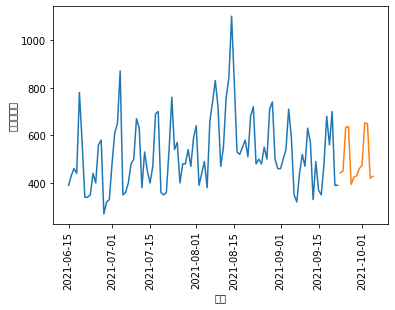

In [14]:
model=sm.tsa.statespace.SARIMAX(pd_x['デリバリー'][305:], order=(2,0,0), seasonal_order=(2,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-23 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred_deli = fit.predict(start=start, end=end)
sns.lineplot(x='日付', y='デリバリー',data=pd_x[-100:])
sns.lineplot(data=pred_deli)
plt.xticks(rotation=90)
pred_deli

In [ ]:
"""
model=sm.tsa.statespace.SARIMAX(pd_x['テイクアウト'][305:], order=(0,1,1), seasonal_order=(0,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-08 00:00:00')
end = pd.to_datetime('2021-09-16 00:00:00')
pred_take = fit.predict(start=start, end=end)
sns.lineplot(x='日付', y='テイクアウト',data=pd_x[-100:])
sns.lineplot(data=pred_take)
plt.xticks(rotation=90)
pred_take
"""

"\nmodel=sm.tsa.statespace.SARIMAX(pd_x['テイクアウト'][305:], order=(0,1,1), seasonal_order=(0,1,1,7))\nfit = model.fit()\nstart = pd.to_datetime('2021-09-08 00:00:00')\nend = pd.to_datetime('2021-09-16 00:00:00')\npred_take = fit.predict(start=start, end=end)\nsns.lineplot(x='日付', y='テイクアウト',data=pd_x[-100:])\nsns.lineplot(data=pred_take)\nplt.xticks(rotation=90)\npred_take\n"

2021-09-23    4170.348298
2021-09-24    4205.517642
2021-09-25    4910.569576
2021-09-26    4848.201867
2021-09-27    4219.244648
2021-09-28    4091.220697
2021-09-29    4096.047758
2021-09-30    4145.322291
2021-10-01    4231.620766
2021-10-02    4899.893344
2021-10-03    4852.524501
2021-10-04    4255.255303
2021-10-05    4107.752670
Freq: D, dtype: float64

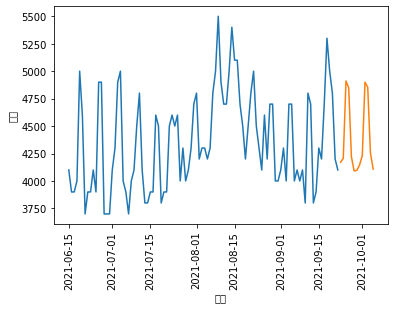

In [15]:
model=sm.tsa.statespace.SARIMAX(pd_x['漫画'][305:], order=(2,0,0), seasonal_order=(2,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-23 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred_comic = fit.predict(start=start, end=end)
sns.lineplot(x='日付', y='漫画',data=pd_x[-100:])
sns.lineplot(data=pred_comic)
plt.xticks(rotation=90)
pred_comic

In [18]:
"""
defaultdict(<class 'tuple'>, {'コンビニ':           pdq    pdq_x_PDQs          aic
defaultdict(<class 'tuple'>, {'デリバリー':           pdq    pdq_x_PDQs          aic
63  (1, 1, 1)  (1, 1, 1, 7)  3736.478868, 'テイクアウト':           pdq    pdq_x_PDQs          aic
59  (1, 1, 1)  (0, 1, 1, 7)  3880.665245, 'off':           pdq    pdq_x_PDQs         aic
39  (1, 0, 0)  (1, 1, 1, 7) -138.925319, '漫画':           pdq    pdq_x_PDQs          aic
59  (1, 1, 1)  (0, 1, 1, 7)  4181.985145, '大阪難波_e':           pdq    pdq_x_PDQs         aic
48  (1, 1, 0)  (0, 0, 0, 7)  111.911853, '公園':           pdq    pdq_x_PDQs          aic
63  (1, 1, 1)  (1, 1, 1, 7)  3680.194906, ''新宿_e:           pdq    pdq_x_PDQs         aic
48  (1, 1, 0)  (0, 0, 0, 7)  111.911853})
"""
pred = pd.DataFrame()
def syntex(pred):

  pred['日付'] = pd.date_range(start='09/23/2021', periods=13, freq='D')
  #pred['ランチ'] = pred_lunch.values
  pred['漫画'] = pred_comic.values
  pred['デリバリー'] = pred_deli.values
  #pred['カラオケ'] = pred_sing.values
  #pred['ゲーム'] = pred_game.values
  #pred['レシピ'] = pred_len.values
  #pred['コンビニ'] = pred_store.values
  #pred['公園'] = pred_park.values
  #pred['テイクアウト'] = pred_take.values
  pred['off'] = [0,0,1,1,0,0,0,0,0,1,1,0,0]
  #pred['大阪難波_e'] = [2,2,2,2,2,2,2,2,2]
  #pred['新宿_e']=[2,2,2,2,2,2,2,2,2]
  #pred['動画'] = pred_anime.values
  pred = pred.set_index('日付')


In [16]:
exog_list = set()
exog_df = pd.DataFrame()
exog_df['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
for cols in all_list:
  col, r = cols
  if col in exog_list:
    continue
  exog_list.add(col)
  exog_df[col] = pd_x[col].values

exog_df = exog_df.set_index('日付')

exog_df.tail()


,漫画,off,デリバリー,テイクアウト
日付,,,,
2021-09-18,5300,1,680,940
2021-09-19,5000,1,560,950
2021-09-20,4800,1,700,720
2021-09-21,4200,0,390,380
2021-09-22,4100,0,390,400


In [19]:
pred = pd.DataFrame()
syntex(pred)
exog_shibuya = pd.DataFrame()
exog_shibuya['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
pred_exog_shibuya = pd.DataFrame()
pred_exog_shibuya['日付'] = pd.date_range(start='09/23/2020', periods=13, freq='D')
for cols in shibuya_list:
  col, r = cols
  if col not in pred.columns:
    continue
  exog_shibuya[col] = pd_x[col].values
  pred_exog_shibuya[col] = pred[col].values
exog_shibuya = exog_shibuya.set_index('日付')
pred_exog_shibuya = pred_exog_shibuya.set_index('日付')

pred_exog_shibuya.tail(13)

,漫画,デリバリー
日付,,
2020-09-23,4170.348298,441.855513
2020-09-24,4205.517642,450.744598
2020-09-25,4910.569576,633.421185
2020-09-26,4848.201867,636.731061
2020-09-27,4219.244648,393.914398
2020-09-28,4091.220697,424.303441
2020-09-29,4096.047758,429.857054
2020-09-30,4145.322291,460.336679
2020-10-01,4231.620766,473.656713


In [26]:
d=q=range(0, 2)
p = range(0,3)
pdq=list(itertools.product(p,d,q))
pdq_x_PDQs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]
a=[]
b=[]
c=[]
wf=[]
for param in pdq:
  for seasonal_param in pdq_x_PDQs:
    try:
      mod = sm.tsa.statespace.SARIMAX(df1['渋谷'],exog=exog_shibuya[305:], order=param, seasonal_order=seasonal_param,enforce_invertibility=False, enforce_stationarity=False)
      results = mod.fit()
      #print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
      a = param
      b = seasonal_param
      c = results.aic
      wf.append((c,a,b))
    except:
      continue

shibuya_pdq_list = sorted(wf, key=lambda x:x[0])[:10]
shibuya_pdq_list

[(6111.802679512442, (2, 1, 1), (2, 1, 1, 7)),
 (6115.484847208176, (2, 0, 0), (2, 1, 1, 7)),
 (6117.414273203363, (2, 0, 0), (2, 1, 0, 7)),
 (6117.726478762654, (2, 0, 1), (2, 1, 0, 7)),
 (6118.205096216446, (2, 0, 1), (2, 1, 1, 7)),
 (6123.328324077625, (2, 1, 1), (2, 1, 0, 7)),
 (6125.620875896377, (2, 1, 0), (2, 1, 1, 7)),
 (6130.289115933507, (1, 1, 1), (2, 1, 1, 7)),
 (6131.841235997303, (1, 0, 1), (2, 1, 1, 7)),
 (6132.726631392356, (2, 1, 0), (2, 1, 0, 7))]

In [20]:
def generate_cv(train, min_train_size, horizon, steps, ex):
  for i in range(0,len(train) - min_train_size - horizon + 1 - 4, steps):
    split_train = train[:min_train_size + i]
    ex_train = ex[:min_train_size + i]
    split_val = train[min_train_size + i + 4:min_train_size+i+horizon + 4]
    #ex_val = ex[min_train_size + i + 4:min_train_size+i+horizon + 4]
    start = train.index[min_train_size + i + 4]
    end = train.index[min_train_size+i+horizon - 1 + 4]
    ex_val = pd.DataFrame()
    ex_val['日付'] = pd.date_range(start=train.index[min_train_size + i], periods=13, freq='D')
    for col in ex.columns:
      if col == 'off':
        continue
      o,s = best_out_order[col]
      model=sm.tsa.statespace.SARIMAX(pd_x[col][305:305 + min_train_size + i], order=o, seasonal_order=s)
      fit = model.fit()
      start = pd.to_datetime(train.index[min_train_size + i])
      end = pd.to_datetime(end)
      pred = fit.predict(start=start, end=end)
      ex_val[col] = pred.values
    if 'off' in ex.columns:
      ex_val['off'] = ex['off'][min_train_size + i:min_train_size+i+horizon + 4].values
    ex_val = ex_val.set_index('日付')
    start = train.index[min_train_size + i + 4]
    yield split_train, split_val, ex_train, ex_val, start, end

In [22]:
cv_shibuya = generate_cv(df1['渋谷'], 210, 9,9, exog_shibuya[305:])
#for cv_train, cv_test, ex_train, ex_val, start, end in cv_shibuya:
#  print(start)
#  print(end)

In [ ]:
scores_shibuya = []
for pdq in shibuya_pdq_list:
  cv_shibuya = generate_cv(df1['渋谷'], 207, 9,9, exog_shibuya[305:])
  new_score = cv_score(cv_shibuya, pdq)
  scores_shibuya.append(sum(new_score) / len(new_score))
  print(scores_shibuya)

7.139731754160642
5.735555549382697
5.750432443371917
16.000957979135634
13.246844863785741
7.825408706557452
13.056157622503196
18.56956099657621
28.41374542456409
20.512474357709955
17.607814390429464
15.622249577256431
[14.12341113878612]
4.286446161885383
6.976761882862873
8.788283869360896
11.154462976767247
5.619219533759283
9.551599555281019
7.571099847037877
15.957982114582986
25.92424635066931
3.120461297507921
12.18586700006092
2.5869541564558407
[14.12341113878612, 9.47694872885263]
5.130522107115684
7.385594855806971
7.177970223687502
12.554309330135549
6.875580304634565
9.978314502741874
11.052099455063807
18.31187982078136
26.551215110768243
8.174892670037485
8.932252565018379
3.8370263269165585
[14.12341113878612, 9.47694872885263, 10.496804772725664]
5.286227743515736
7.40234024035234
7.315026482526416
12.51431152907887
7.5177611697153
9.883077557900926
11.537347685697513
17.565062085797855
25.61970630014298
9.854743966288131
9.249728211815734
3.8220604658179673
[14.123

2021-09-27    62155.731031
2021-09-28    63095.175981
2021-09-29    65021.982225
2021-09-30    64171.442375
2021-10-01    68374.974690
2021-10-02    59400.436350
2021-10-03    52925.906980
2021-10-04    61728.257993
2021-10-05    63225.071944
Freq: D, dtype: float64

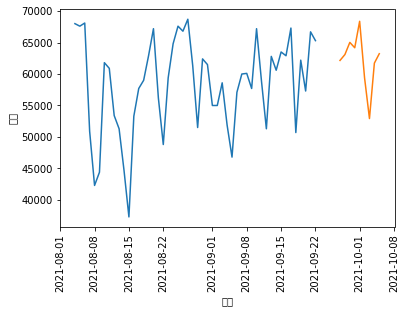

In [ ]:

result = []
model=sm.tsa.statespace.SARIMAX(df1['渋谷'],exog=exog_shibuya[305:], order=(1,0,1), seasonal_order=(1,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-27 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred = fit.predict(start=start, end=end, exog=pred_exog_shibuya)
result.append(pred)
sns.lineplot(x='日付', y='渋谷',data=df1[-50:])
sns.lineplot(data=pred)
plt.xticks(rotation=90)
pred

1. To extract other factors for each area

  exog_area = other factors for training
  pred_exog_area = other factors for prediction

In [ ]:
pred = pd.DataFrame()
syntex(pred)
exog_shinjuku = pd.DataFrame()
exog_shinjuku['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
pred_exog_shinjuku = pd.DataFrame()
pred_exog_shinjuku['日付'] = pd.date_range(start='09/23/2020', periods=13, freq='D')
for cols in shinjuku_list:
  col, r = cols
  if col not in pred.columns:
    continue
  exog_shinjuku[col] = pd_x[col].values
  pred_exog_shinjuku[col] = pred[col].values
exog_shinjuku = exog_shinjuku.set_index('日付')
pred_exog_shinjuku = pred_exog_shinjuku.set_index('日付')
pred_exog_shinjuku.tail(7)

,デリバリー
日付,
2020-09-29,429.857054
2020-09-30,460.336679
2020-10-01,473.656713
2020-10-02,652.041535
2020-10-03,648.798255
2020-10-04,420.029137
2020-10-05,427.999884


2. Find best Order and Seasonal Order

  a. Change endog variable
  
  b. Change exog variable


In [ ]:
d=q=range(0, 2)
p = range(0,3)
pdq=list(itertools.product(p,d,q))
pdq_x_PDQs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]
a=[]
b=[]
c=[]
wf=[]
for param in pdq:
  for seasonal_param in pdq_x_PDQs:
    try:
      mod = sm.tsa.statespace.SARIMAX(df2['新宿'],exog=exog_shinjuku[305:],order=param, seasonal_order=seasonal_param,enforce_invertibility=False, enforce_stationarity=False)
      results = mod.fit()
      #print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
      a = param
      b = seasonal_param
      c = results.aic
      wf.append((c,a,b))
    except:
      continue

shinjuku_pdq_list = sorted(wf, key=lambda x:x[0])[:10]
shinjuku_pdq_list

[(5906.921868546506, (2, 1, 0), (2, 1, 1, 7)),
 (5922.2823501294715, (2, 1, 0), (2, 1, 0, 7)),
 (5929.091946382887, (1, 1, 1), (2, 1, 1, 7)),
 (5938.008088033352, (2, 1, 1), (2, 1, 1, 7)),
 (5939.5556304620595, (2, 0, 1), (2, 1, 1, 7)),
 (5940.579585150423, (2, 0, 0), (2, 1, 1, 7)),
 (5941.036444506132, (2, 0, 1), (2, 1, 0, 7)),
 (5941.662207943474, (1, 0, 0), (2, 1, 0, 7)),
 (5942.956602191272, (2, 0, 0), (2, 1, 0, 7)),
 (5944.438659447821, (2, 1, 1), (2, 1, 0, 7))]

In [ ]:
scores_shinjuku = []
for pdq in shinjuku_pdq_list:
  cv_shinjuku = generate_cv(df2['新宿'], 210, 9,9, exog_shinjuku[305:])
  new_score = cv_score(cv_shinjuku, pdq)
  scores_shinjuku.append(sum(new_score) / len(new_score))
  print(scores_shinjuku)
print(scores_shinjuku)

2021-06-03 00:00:00 2021-06-11 00:00:00
2021-06-12 00:00:00 2021-06-20 00:00:00
2021-06-21 00:00:00 2021-06-29 00:00:00
2021-06-30 00:00:00 2021-07-08 00:00:00
2021-07-09 00:00:00 2021-07-17 00:00:00
2021-07-18 00:00:00 2021-07-26 00:00:00
2021-07-27 00:00:00 2021-08-04 00:00:00
2021-08-05 00:00:00 2021-08-13 00:00:00
2021-08-14 00:00:00 2021-08-22 00:00:00
2021-08-23 00:00:00 2021-08-31 00:00:00
2021-09-01 00:00:00 2021-09-09 00:00:00
2021-09-10 00:00:00 2021-09-18 00:00:00
[10.078399026191876]
2021-06-03 00:00:00 2021-06-11 00:00:00
2021-06-12 00:00:00 2021-06-20 00:00:00
2021-06-21 00:00:00 2021-06-29 00:00:00
2021-06-30 00:00:00 2021-07-08 00:00:00
2021-07-09 00:00:00 2021-07-17 00:00:00
2021-07-18 00:00:00 2021-07-26 00:00:00
2021-07-27 00:00:00 2021-08-04 00:00:00
2021-08-05 00:00:00 2021-08-13 00:00:00
2021-08-14 00:00:00 2021-08-22 00:00:00
2021-08-23 00:00:00 2021-08-31 00:00:00
2021-09-01 00:00:00 2021-09-09 00:00:00
2021-09-10 00:00:00 2021-09-18 00:00:00
[10.078399026191876

2021-09-27    45732.119221
2021-09-28    46125.807639
2021-09-29    47311.216278
2021-09-30    46542.679921
2021-10-01    50461.987450
2021-10-02    44815.743756
2021-10-03    39750.074204
2021-10-04    45294.153638
2021-10-05    46017.902626
Freq: D, dtype: float64

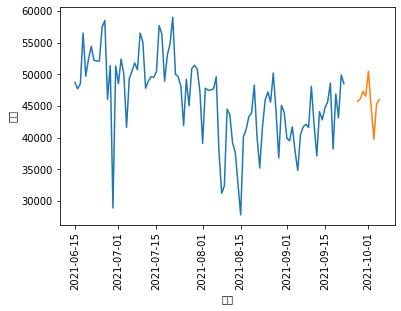

In [ ]:
#010 2227
model=sm.tsa.statespace.SARIMAX(df2['新宿'],exog=exog_shinjuku[305:], order=(2,0,1), seasonal_order=(2,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-27 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred = fit.predict(start=start, end=end, exog=pred_exog_shinjuku)
result.append(pred)
sns.lineplot(x='日付', y='新宿',data=df2[-100:])
sns.lineplot(data=pred)
plt.xticks(rotation=90)
pred

In [ ]:
pred = pd.DataFrame()
syntex(pred)
exog_maru = pd.DataFrame()
exog_maru['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
pred_exog_maru = pd.DataFrame()
pred_exog_maru['日付'] = pd.date_range(start='09/23/2020', periods=13, freq='D')
found = 0
for cols in maru_list:
  col, r = cols
  if col not in pred.columns:
    continue
  if col == 'off':
    found = 1
    continue
  exog_maru[col] = pd_x[col].values
  pred_exog_maru[col] = pred[col].values
if found:
  exog_maru['off'] = pd_x['off'].values
  pred_exog_maru['off'] = pred['off'].values
exog_maru = exog_maru.set_index('日付')
pred_exog_maru = pred_exog_maru.set_index('日付')
pred_exog_maru.tail(13)

,漫画,デリバリー,off
日付,,,
2020-09-23,4170.348298,441.855513,0
2020-09-24,4205.517642,450.744598,0
2020-09-25,4910.569576,633.421185,1
2020-09-26,4848.201867,636.731061,1
2020-09-27,4219.244648,393.914398,0
2020-09-28,4091.220697,424.303441,0
2020-09-29,4096.047758,429.857054,0
2020-09-30,4145.322291,460.336679,0
2020-10-01,4231.620766,473.656713,0


In [ ]:
d=q=range(0, 2)
p = range(0,3)
pdq=list(itertools.product(p,d,q))
pdq_x_PDQs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]
a=[]
b=[]
c=[]
wf=[]
for param in pdq:
  for seasonal_param in pdq_x_PDQs:
    try:
      mod = sm.tsa.statespace.SARIMAX(df3['丸の内'],exog=exog_maru[305:], order=param, seasonal_order=seasonal_param,enforce_invertibility=False, enforce_stationarity=False)
      results = mod.fit()
      #print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
      a = param
      b = seasonal_param
      c = results.aic
      wf.append((c,a,b))
    except:
      continue

maru_pdq_list = sorted(wf, key=lambda x:x[0])[:10]
maru_pdq_list

[(6196.456868266794, (2, 1, 1), (2, 1, 1, 7)),
 (6201.826876205299, (2, 0, 0), (2, 1, 1, 7)),
 (6205.842897953259, (2, 1, 0), (2, 1, 1, 7)),
 (6205.955265564721, (2, 0, 1), (2, 1, 0, 7)),
 (6206.416521825007, (2, 0, 0), (2, 1, 0, 7)),
 (6210.033557621893, (2, 1, 1), (2, 1, 0, 7)),
 (6215.027583189192, (2, 1, 0), (2, 1, 0, 7)),
 (6217.601453985348, (1, 1, 1), (2, 1, 1, 7)),
 (6218.2077646081125, (0, 1, 0), (2, 1, 1, 7)),
 (6220.906452740142, (1, 0, 0), (2, 1, 1, 7))]

In [ ]:
scores_maru = []
for pdq in maru_pdq_list:
  cv_maru = generate_cv(df3['丸の内'], 210, 9,9, exog_maru[305:])
  new_score = cv_score(cv_maru, pdq)
  scores_maru.append(sum(new_score) / len(new_score))
  print(scores_maru)
print(scores_maru)

2021-06-03 00:00:00 2021-06-11 00:00:00
2021-06-12 00:00:00 2021-06-20 00:00:00
2021-06-21 00:00:00 2021-06-29 00:00:00
2021-06-30 00:00:00 2021-07-08 00:00:00
2021-07-09 00:00:00 2021-07-17 00:00:00
2021-07-18 00:00:00 2021-07-26 00:00:00
2021-07-27 00:00:00 2021-08-04 00:00:00
2021-08-05 00:00:00 2021-08-13 00:00:00
2021-08-14 00:00:00 2021-08-22 00:00:00
2021-08-23 00:00:00 2021-08-31 00:00:00
2021-09-01 00:00:00 2021-09-09 00:00:00
2021-09-10 00:00:00 2021-09-18 00:00:00
[14.716316794105474]
2021-06-03 00:00:00 2021-06-11 00:00:00
2021-06-12 00:00:00 2021-06-20 00:00:00
2021-06-21 00:00:00 2021-06-29 00:00:00
2021-06-30 00:00:00 2021-07-08 00:00:00
2021-07-09 00:00:00 2021-07-17 00:00:00
2021-07-18 00:00:00 2021-07-26 00:00:00
2021-07-27 00:00:00 2021-08-04 00:00:00
2021-08-05 00:00:00 2021-08-13 00:00:00
2021-08-14 00:00:00 2021-08-22 00:00:00
2021-08-23 00:00:00 2021-08-31 00:00:00
2021-09-01 00:00:00 2021-09-09 00:00:00
2021-09-10 00:00:00 2021-09-18 00:00:00
[14.716316794105474

In [ ]:
  cv_maru = generate_cv(df3['丸の内'], 210, 9,9, exog_maru[305:])
  new_score = cv_score(cv_maru, (1, (1,0,1),(1,1,1,7)))
  scores_maru.append(sum(new_score) / len(new_score))
  print(scores_maru)

2021-06-03 00:00:00 2021-06-11 00:00:00
2021-06-12 00:00:00 2021-06-20 00:00:00
2021-06-21 00:00:00 2021-06-29 00:00:00
2021-06-30 00:00:00 2021-07-08 00:00:00
2021-07-09 00:00:00 2021-07-17 00:00:00
2021-07-18 00:00:00 2021-07-26 00:00:00
2021-07-27 00:00:00 2021-08-04 00:00:00
2021-08-05 00:00:00 2021-08-13 00:00:00
2021-08-14 00:00:00 2021-08-22 00:00:00
2021-08-23 00:00:00 2021-08-31 00:00:00
2021-09-01 00:00:00 2021-09-09 00:00:00
2021-09-10 00:00:00 2021-09-18 00:00:00
[14.716316794105474, 8.057839926835438, 14.806601569387448, 9.346211989109802, 9.18861066685461, 15.832660705265118, 17.852291958368312, 14.759041091218911, 15.22183649037344, 7.94535422934169, 8.077223934673698, 7.943490199878781]


2021-09-27    84639.283143
2021-09-28    84071.066768
2021-09-29    85221.251849
2021-09-30    84915.013930
2021-10-01    90068.108425
2021-10-02    54715.424825
2021-10-03    51541.636651
2021-10-04    84002.085867
2021-10-05    83881.296224
Freq: D, dtype: float64

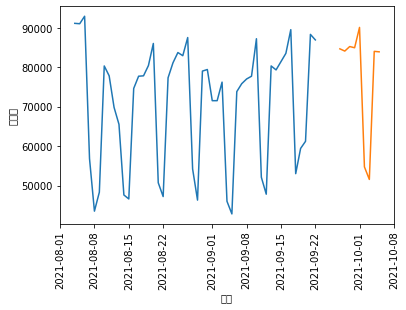

In [ ]:
model=sm.tsa.statespace.SARIMAX(df3['丸の内'],exog=exog_maru[305:], order=(1,0,0), seasonal_order=(2,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-27 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred = fit.predict(start=start, end=end, exog=pred_exog_maru)
result.append(pred)
sns.lineplot(x='日付', y='丸の内',data=df3[-50:])
sns.lineplot(data=pred)
plt.xticks(rotation=90)
pred

In [ ]:
pred = pd.DataFrame()
syntex(pred)
exog_shina = pd.DataFrame()
exog_shina['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
pred_exog_shina = pd.DataFrame()
pred_exog_shina['日付'] = pd.date_range(start='09/23/2020', periods=13, freq='D')
found = 0
for cols in Shinagawa_list:
  col, r = cols
  if col not in pred.columns:
    continue
  if col == 'off':
    found = 1
    continue
  exog_shina[col] = pd_x[col].values
  pred_exog_shina[col] = pred[col].values
if found:
  exog_shina['off'] = pd_x['off'].values
  pred_exog_shina['off'] = pred['off'].values
exog_shina = exog_shina.set_index('日付')
pred_exog_shina = pred_exog_shina.set_index('日付')
pred_exog_shina.tail(7)

,漫画,デリバリー,off
日付,,,
2020-09-29,4096.047758,429.857054,0
2020-09-30,4145.322291,460.336679,0
2020-10-01,4231.620766,473.656713,0
2020-10-02,4899.893344,652.041535,1
2020-10-03,4852.524501,648.798255,1
2020-10-04,4255.255303,420.029137,0
2020-10-05,4107.752670,427.999884,0


In [ ]:
def get_list(data, ex):
  d=q=range(0, 2)
  p = range(0,2)
  pdq=list(itertools.product(p,d,q))
  pdq_x_PDQs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]
  a=[]
  b=[]
  c=[]
  wf=[]
  for param in pdq:
    for seasonal_param in pdq_x_PDQs:
      try:
        mod = sm.tsa.statespace.SARIMAX(data,exog=ex, order=param, seasonal_order=seasonal_param,enforce_invertibility=False, enforce_stationarity=False)
        results = mod.fit()
        #print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
        a = param
        b = seasonal_param
        c = results.aic
        wf.append((c,a,b))
      except:
        continue

  pdq_list = sorted(wf, key=lambda x:x[0])[:10]
  return pdq_list

In [ ]:
shinagawa_pdq_list = get_list(df4['品川'], exog_shina[305:])
shinagawa_pdq_list

[(5938.108144665139, (1, 0, 1), (1, 1, 1, 7)),
 (5940.09626711526, (0, 1, 1), (1, 1, 1, 7)),
 (5943.370340579959, (0, 1, 1), (0, 1, 1, 7)),
 (5947.356548249341, (1, 1, 1), (0, 1, 1, 7)),
 (5948.282723092832, (1, 1, 1), (1, 1, 1, 7)),
 (5960.738027770007, (1, 1, 0), (1, 1, 1, 7)),
 (5962.746743760373, (1, 0, 1), (0, 1, 1, 7)),
 (5963.187575953034, (1, 1, 0), (0, 1, 1, 7)),
 (5967.415204206887, (1, 0, 0), (0, 1, 1, 7)),
 (5968.82590654392, (0, 1, 0), (1, 1, 1, 7))]

In [ ]:
def get_cv_scores(data, ex ,l):
  score = []
  for pdq in l:
    cv = generate_cv(data, 210, 9,9, ex)
    new_score = cv_score(cv, pdq)
    score.append(sum(new_score) / len(new_score))

  return score

In [ ]:
scores_shina = get_cv_scores(df4['品川'], exog_shina[305:], shinagawa_pdq_list)
scores_shina

2021-06-03 00:00:00 2021-06-11 00:00:00
2021-06-12 00:00:00 2021-06-20 00:00:00
2021-06-21 00:00:00 2021-06-29 00:00:00
2021-06-30 00:00:00 2021-07-08 00:00:00
2021-07-09 00:00:00 2021-07-17 00:00:00
2021-07-18 00:00:00 2021-07-26 00:00:00
2021-07-27 00:00:00 2021-08-04 00:00:00
2021-08-05 00:00:00 2021-08-13 00:00:00
2021-08-14 00:00:00 2021-08-22 00:00:00
2021-08-23 00:00:00 2021-08-31 00:00:00
2021-09-01 00:00:00 2021-09-09 00:00:00
2021-09-10 00:00:00 2021-09-18 00:00:00
2021-06-03 00:00:00 2021-06-11 00:00:00
2021-06-12 00:00:00 2021-06-20 00:00:00
2021-06-21 00:00:00 2021-06-29 00:00:00
2021-06-30 00:00:00 2021-07-08 00:00:00
2021-07-09 00:00:00 2021-07-17 00:00:00
2021-07-18 00:00:00 2021-07-26 00:00:00
2021-07-27 00:00:00 2021-08-04 00:00:00
2021-08-05 00:00:00 2021-08-13 00:00:00
2021-08-14 00:00:00 2021-08-22 00:00:00
2021-08-23 00:00:00 2021-08-31 00:00:00
2021-09-01 00:00:00 2021-09-09 00:00:00
2021-09-10 00:00:00 2021-09-18 00:00:00
2021-06-03 00:00:00 2021-06-11 00:00:00


[9.752444816668898,
 19.274474044107205,
 18.57080993305603,
 17.936655864556382,
 18.282129263441288,
 19.612591841510504,
 9.76482743284841,
 18.801936918068943,
 9.958871109279112,
 19.460084876555808]

2021-09-27    38834.885514
2021-09-28    38727.120718
2021-09-29    39591.071241
2021-09-30    39509.220590
2021-10-01    41052.152254
2021-10-02    22186.684535
2021-10-03    19544.484789
2021-10-04    38461.135745
2021-10-05    38561.302892
Freq: D, dtype: float64

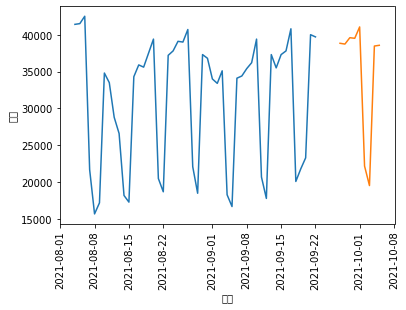

In [ ]:
model=sm.tsa.statespace.SARIMAX(df4['品川'],exog=exog_shina[305:], order=(1,0,1), seasonal_order=(1,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-27 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred = fit.predict(start=start, end=end, exog=pred_exog_shina)
result.append(pred)
sns.lineplot(x='日付', y='品川',data=df4[-50:])
sns.lineplot(data=pred)
plt.xticks(rotation=90)
pred

In [ ]:
pred = pd.DataFrame()
syntex(pred)
exog_xiabei = pd.DataFrame()
exog_xiabei['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
pred_exog_xiabei = pd.DataFrame()
pred_exog_xiabei['日付'] = pd.date_range(start='09/23/2020', periods=13, freq='D')
found = 0
for cols in Shimokitazawa_list:
  col, r = cols
  if col == 'off':
    found = 1
    continue
  if col not in pred.columns:
    continue
  exog_xiabei[col] = pd_x[col].values
  pred_exog_xiabei[col] = pred[col].values
if found:
  exog_xiabei['off'] = pd_x['off'].values
  pred_exog_xiabei['off'] = pred['off'].values
exog_xiabei = exog_xiabei.set_index('日付')
pred_exog_xiabei = pred_exog_xiabei.set_index('日付')
pred_exog_xiabei.tail(7)

,漫画
日付,
2020-09-29,4096.047758
2020-09-30,4145.322291
2020-10-01,4231.620766
2020-10-02,4899.893344
2020-10-03,4852.524501
2020-10-04,4255.255303
2020-10-05,4107.752670


In [ ]:
xiabei_pdq_list = get_list(df5['下北沢'], exog_xiabei[305:])
print(xiabei_pdq_list)
scores_xiabei = get_cv_scores(df5['下北沢'], exog_xiabei[305:], xiabei_pdq_list)
print(scores_xiabei)


[(5391.973778739337, (1, 1, 1), (0, 1, 1, 7)), (5393.950951468158, (1, 1, 1), (1, 1, 1, 7)), (5404.3505223741595, (0, 1, 1), (0, 1, 1, 7)), (5406.307538631136, (0, 1, 1), (1, 1, 1, 7)), (5412.010807954757, (1, 0, 1), (0, 1, 1, 7)), (5413.96122287326, (1, 0, 1), (1, 1, 1, 7)), (5426.288705539226, (1, 1, 0), (0, 1, 1, 7)), (5428.050357887356, (1, 1, 0), (1, 1, 1, 7)), (5438.970176381343, (1, 0, 0), (0, 1, 1, 7)), (5440.581127366307, (1, 0, 0), (1, 1, 1, 7))]
[11.024232096220805, 11.308329036259304, 11.130791921493596, 11.463734420092564, 9.666907850431292, 9.399380805068192, 11.020869065462984, 11.3047206234744, 9.440460136627795, 9.443375054788364]


In [ ]:
xiabei_pdq_list

[(5391.973778739337, (1, 1, 1), (0, 1, 1, 7)),
 (5393.950951468158, (1, 1, 1), (1, 1, 1, 7)),
 (5404.3505223741595, (0, 1, 1), (0, 1, 1, 7)),
 (5406.307538631136, (0, 1, 1), (1, 1, 1, 7)),
 (5412.010807954757, (1, 0, 1), (0, 1, 1, 7)),
 (5413.96122287326, (1, 0, 1), (1, 1, 1, 7)),
 (5426.288705539226, (1, 1, 0), (0, 1, 1, 7)),
 (5428.050357887356, (1, 1, 0), (1, 1, 1, 7)),
 (5438.970176381343, (1, 0, 0), (0, 1, 1, 7)),
 (5440.581127366307, (1, 0, 0), (1, 1, 1, 7))]

In [ ]:
scores_xiabei

[11.024232096220805,
 11.308329036259304,
 11.130791921493596,
 11.463734420092564,
 9.666907850431292,
 9.399380805068192,
 11.020869065462984,
 11.3047206234744,
 9.440460136627795,
 9.443375054788364]

2021-09-27    15620.034909
2021-09-28    15885.879163
2021-09-29    16121.233879
2021-09-30    16055.048966
2021-10-01    16816.369864
2021-10-02    14129.139631
2021-10-03    12953.641842
2021-10-04    15434.038492
2021-10-05    15793.564497
Freq: D, dtype: float64

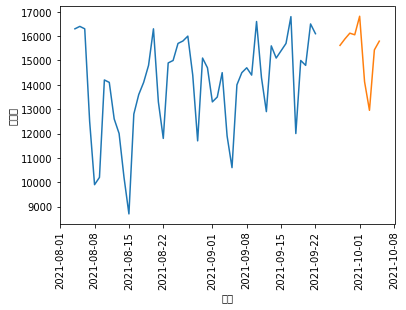

In [ ]:
model=sm.tsa.statespace.SARIMAX(df5['下北沢'],exog=exog_xiabei[305:], order=(1,0,1), seasonal_order=(1,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-27 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred = fit.predict(start=start, end=end, exog=pred_exog_xiabei)
result.append(pred)
sns.lineplot(x='日付', y='下北沢',data=df5[-50:])
sns.lineplot(data=pred)
plt.xticks(rotation=90)
pred

In [ ]:
pred = pd.DataFrame()
syntex(pred)
exog_hachi = pd.DataFrame()
exog_hachi['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
pred_exog_hachi = pd.DataFrame()
pred_exog_hachi['日付'] = pd.date_range(start='09/23/2020', periods=13, freq='D')
for cols in hachi_list:
  col, r = cols
  if col not in pred.columns:
    continue
  exog_hachi[col] = pd_x[col].values
  pred_exog_hachi[col] = pred[col].values
exog_hachi = exog_hachi.set_index('日付')
pred_exog_hachi = pred_exog_hachi.set_index('日付')
pred_exog_hachi.tail(7)

,漫画,デリバリー,off
日付,,,
2020-09-29,4096.047758,429.857054,0
2020-09-30,4145.322291,460.336679,0
2020-10-01,4231.620766,473.656713,0
2020-10-02,4899.893344,652.041535,1
2020-10-03,4852.524501,648.798255,1
2020-10-04,4255.255303,420.029137,0
2020-10-05,4107.752670,427.999884,0


In [ ]:
hachi_pdq_list = get_list(df6['八王子'], exog_hachi[305:])

scores_hachi = get_cv_scores(df6['八王子'], exog_hachi[305:], hachi_pdq_list)
scores_hachi

[10.032343878696574,
 10.207143834709695,
 10.727780516179186,
 10.864465776218692,
 10.028886466027538,
 9.984951188210138,
 10.669759225834587,
 10.872140273073036,
 9.137466392171278,
 9.750665407902057]

In [ ]:
hachi_pdq_list

[(4684.806445527475, (1, 1, 1), (0, 1, 1, 7)),
 (4686.70715926517, (1, 1, 1), (1, 1, 1, 7)),
 (4689.985629405464, (0, 1, 1), (0, 1, 1, 7)),
 (4691.948276372281, (0, 1, 1), (1, 1, 1, 7)),
 (4693.207916097376, (1, 0, 1), (0, 1, 1, 7)),
 (4693.6310519120525, (1, 0, 1), (1, 1, 1, 7)),
 (4713.766607689799, (1, 1, 0), (0, 1, 1, 7)),
 (4715.593264788948, (1, 1, 0), (1, 1, 1, 7)),
 (4725.81798755036, (1, 0, 0), (1, 1, 1, 7)),
 (4728.146594485928, (1, 0, 0), (0, 1, 1, 7))]

2021-09-27    5966.400108
2021-09-28    5949.856446
2021-09-29    6098.994800
2021-09-30    5983.717164
2021-10-01    6342.727385
2021-10-02    5225.810851
2021-10-03    4413.617460
2021-10-04    5832.660532
2021-10-05    5912.567720
Freq: D, dtype: float64

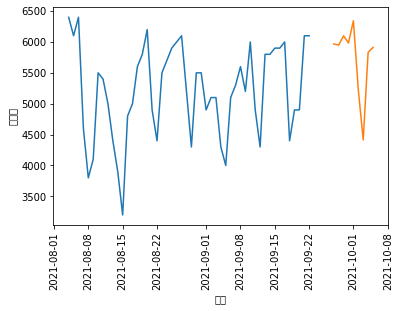

In [ ]:
model=sm.tsa.statespace.SARIMAX(df6['八王子'],exog=exog_hachi[305:], order=(1,0,0), seasonal_order=(1,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-27 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred = fit.predict(start=start, end=end, exog=pred_exog_hachi)
result.append(pred)
sns.lineplot(x='日付', y='八王子',data=df6[-50:])
sns.lineplot(data=pred)
plt.xticks(rotation=90)
pred

In [ ]:
pred = pd.DataFrame()
syntex(pred)
exog_osaka = pd.DataFrame()
exog_osaka['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
pred_exog_osaka = pd.DataFrame()
pred_exog_osaka['日付'] = pd.date_range(start='09/23/2020', periods=13, freq='D')
for cols in osaka_list:
  col, r = cols
  if col not in pred.columns:
    continue
  exog_osaka[col] = pd_x[col].values
  pred_exog_osaka[col] = pred[col].values
exog_osaka = exog_osaka.set_index('日付')
pred_exog_osaka = pred_exog_osaka.set_index('日付')
pred_exog_osaka.tail(7)

,デリバリー
日付,
2020-09-29,429.857054
2020-09-30,460.336679
2020-10-01,473.656713
2020-10-02,652.041535
2020-10-03,648.798255
2020-10-04,420.029137
2020-10-05,427.999884


In [ ]:
osaka_pdq_list = get_list(df7['大阪難波'], exog_osaka[305:])
scores_osaka = get_cv_scores(df7['大阪難波'], exog_osaka[305:], osaka_pdq_list)
osaka_pdq_list

[(5836.726520827949, (1, 0, 1), (1, 1, 1, 7)),
 (5839.083179950302, (0, 1, 1), (1, 1, 1, 7)),
 (5839.189919774287, (1, 0, 1), (0, 1, 1, 7)),
 (5839.233345096974, (0, 1, 1), (0, 1, 1, 7)),
 (5845.868957913632, (1, 1, 1), (0, 1, 1, 7)),
 (5847.554355645205, (1, 1, 1), (1, 1, 1, 7)),
 (5862.079312260226, (1, 0, 0), (1, 1, 1, 7)),
 (5864.94934336265, (1, 1, 0), (1, 1, 1, 7)),
 (5865.826698155942, (1, 1, 0), (0, 1, 1, 7)),
 (5873.8820318847875, (0, 1, 0), (1, 1, 1, 7))]

In [ ]:
scores_osaka

[8.371291842162288,
 10.077483197818953,
 8.344229144771022,
 9.88747048879863,
 9.535156124859567,
 9.294218436917637,
 8.956810786512323,
 10.118744277525535,
 9.964525106964297,
 10.13024187863136]

2021-09-27    29994.442122
2021-09-28    30218.130122
2021-09-29    30617.840722
2021-09-30    30491.509226
2021-10-01    32222.045093
2021-10-02    27677.684274
2021-10-03    24797.395256
2021-10-04    29778.271395
2021-10-05    30213.296603
Freq: D, dtype: float64

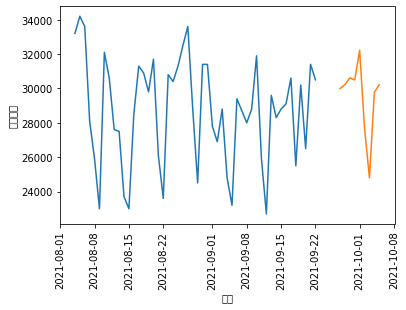

In [ ]:
model=sm.tsa.statespace.SARIMAX(df7['大阪難波'],exog=exog_osaka[305:], order=(1,0,1), seasonal_order=(0,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-27 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred = fit.predict(start=start, end=end, exog=pred_exog_osaka)
result.append(pred)
sns.lineplot(x='日付', y='大阪難波',data=df7[-50:])
sns.lineplot(data=pred)
plt.xticks(rotation=90)
pred

In [ ]:
pred = pd.DataFrame()
syntex(pred)
exog_zha = pd.DataFrame()
exog_zha['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
pred_exog_zha = pd.DataFrame()
pred_exog_zha['日付'] = pd.date_range(start='09/23/2020', periods=13, freq='D')
for cols in zha_list:
  col, r = cols
  if col not in pred.columns:
    continue
  if col == 'off':
    continue
  exog_zha[col] = pd_x[col].values
  pred_exog_zha[col] = pred[col].values
exog_zha['off'] = pd_x['off'].values
pred_exog_zha['off'] = pred['off'].values
exog_zha = exog_zha.set_index('日付')
pred_exog_zha = pred_exog_zha.set_index('日付')
pred_exog_zha.tail(7)

,漫画,off
日付,,
2020-09-29,4096.047758,0
2020-09-30,4145.322291,0
2020-10-01,4231.620766,0
2020-10-02,4899.893344,1
2020-10-03,4852.524501,1
2020-10-04,4255.255303,0
2020-10-05,4107.752670,0


In [ ]:
zha_pdq_list = get_list(df8['札幌大通'], exog_zha[305:])
scores_zha = get_cv_scores(df8['札幌大通'], exog_zha[305:], zha_pdq_list)
zha_pdq_list

[(5237.937166107591, (1, 1, 1), (0, 1, 1, 7)),
 (5239.767582877308, (1, 1, 1), (1, 1, 1, 7)),
 (5242.465795900589, (0, 1, 1), (0, 1, 1, 7)),
 (5243.51191097399, (0, 1, 1), (1, 1, 1, 7)),
 (5247.304839460428, (1, 0, 1), (1, 1, 1, 7)),
 (5247.713620592947, (1, 0, 1), (0, 1, 1, 7)),
 (5259.606337967707, (1, 1, 0), (0, 1, 1, 7)),
 (5260.2934604939965, (1, 1, 0), (1, 1, 1, 7)),
 (5272.72612056767, (1, 0, 0), (1, 1, 1, 7)),
 (5274.203714237944, (0, 1, 0), (1, 1, 1, 7))]

In [ ]:
scores_zha

[9.449532529916953,
 9.564956382090022,
 13.94922794965329,
 13.132763037455618,
 7.746220984428085,
 7.660835373349219,
 14.037449565346742,
 13.146375671160927,
 7.672369603866671,
 13.294506890621058]

2021-09-27    16585.223331
2021-09-28    16658.971470
2021-09-29    16792.836363
2021-09-30    16645.206178
2021-10-01    17340.861415
2021-10-02    11413.143743
2021-10-03     9301.150145
2021-10-04    16505.529107
2021-10-05    16602.069219
Freq: D, dtype: float64

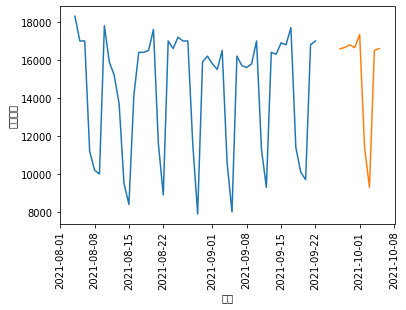

In [ ]:
model=sm.tsa.statespace.SARIMAX(df8['札幌大通'],exog=exog_zha[305:], order=(1,0,1), seasonal_order=(0,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-27 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred = fit.predict(start=start, end=end, exog=pred_exog_zha)
result.append(pred)
sns.lineplot(x='日付', y='札幌大通',data=df8[-50:])
sns.lineplot(data=pred)
plt.xticks(rotation=90)
pred

In [ ]:
pred = pd.DataFrame()
syntex(pred)
exog_xian = pd.DataFrame()
exog_xian['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
pred_exog_xian = pd.DataFrame()
pred_exog_xian['日付'] = pd.date_range(start='09/23/2020', periods=13, freq='D')
for cols in xian_list:
  col, r = cols
  if col not in pred.columns:
    continue
  if 'off' == col:
    continue
  exog_xian[col] = pd_x[col].values
  pred_exog_xian[col] = pred[col].values
exog_xian['off'] = pd_x['off'].values
pred_exog_xian['off'] = pred['off'].values
exog_xian = exog_xian.set_index('日付')
pred_exog_xian = pred_exog_xian.set_index('日付')
pred_exog_xian.tail(7)

,漫画,デリバリー,off
日付,,,
2020-09-29,4096.047758,429.857054,0
2020-09-30,4145.322291,460.336679,0
2020-10-01,4231.620766,473.656713,0
2020-10-02,4899.893344,652.041535,1
2020-10-03,4852.524501,648.798255,1
2020-10-04,4255.255303,420.029137,0
2020-10-05,4107.752670,427.999884,0


In [ ]:
xian_pdq_list = get_list(df9['仙台駅'], exog_xian[305:])
scores_xian = get_cv_scores(df9['仙台駅'], exog_xian[305:], xian_pdq_list)
xian_pdq_list

[(5366.348933010331, (1, 1, 1), (0, 1, 1, 7)),
 (5367.70682188417, (1, 1, 1), (1, 1, 1, 7)),
 (5388.132210075953, (1, 0, 1), (0, 1, 1, 7)),
 (5389.346931035183, (1, 0, 1), (1, 1, 1, 7)),
 (5393.013343798023, (0, 1, 1), (0, 1, 1, 7)),
 (5393.409330179953, (0, 1, 1), (1, 1, 1, 7)),
 (5411.557190219159, (1, 0, 0), (0, 1, 1, 7)),
 (5412.303052794146, (1, 0, 0), (1, 1, 1, 7)),
 (5416.783334637097, (1, 1, 0), (1, 1, 1, 7)),
 (5417.79985755617, (1, 1, 0), (0, 1, 1, 7))]

In [ ]:
scores_xian

[8.837056729658595,
 8.70781952041183,
 9.86799484417137,
 10.84474961906596,
 10.989380840550135,
 11.233021484049665,
 10.029413918318413,
 10.622389005616862,
 11.377264724509395,
 11.176021240304513]

2021-09-27    20404.702771
2021-09-28    19536.508494
2021-09-29    19667.189481
2021-09-30    19680.678240
2021-10-01    21140.246065
2021-10-02    16033.494129
2021-10-03    15084.373836
2021-10-04    20104.206455
2021-10-05    19709.045490
Freq: D, dtype: float64

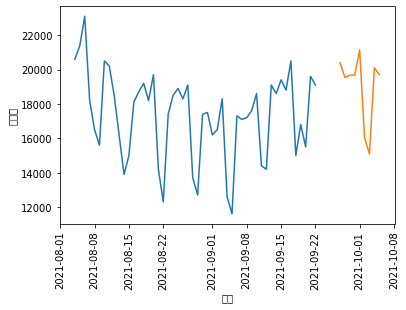

In [ ]:
model=sm.tsa.statespace.SARIMAX(df9['仙台駅'],exog=exog_xian[305:], order=(1,1,1), seasonal_order=(1,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-27 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred = fit.predict(start=start, end=end, exog=pred_exog_xian)
result.append(pred)
sns.lineplot(x='日付', y='仙台駅',data=df9[-50:])
sns.lineplot(data=pred)
plt.xticks(rotation=90)
pred

In [ ]:
pred = pd.DataFrame()
syntex(pred)
exog_fu = pd.DataFrame()
exog_fu['日付'] = pd.date_range(start='01/01/2020', periods=631, freq='D')
pred_exog_fu = pd.DataFrame()
pred_exog_fu['日付'] = pd.date_range(start='09/23/2020', periods=13, freq='D')
for cols in fu_list:
  col, r = cols
  if col not in pred.columns:
    continue
  if 'off' == col:
    continue
  exog_fu[col] = pd_x[col].values
  pred_exog_fu[col] = pred[col].values
exog_fu['off'] = pd_x['off'].values
pred_exog_fu['off'] = pred['off'].values
exog_fu = exog_fu.set_index('日付')
pred_exog_fu = pred_exog_fu.set_index('日付')
pred_exog_fu.tail(7)

,漫画,デリバリー,off
日付,,,
2020-09-29,4096.047758,429.857054,0
2020-09-30,4145.322291,460.336679,0
2020-10-01,4231.620766,473.656713,0
2020-10-02,4899.893344,652.041535,1
2020-10-03,4852.524501,648.798255,1
2020-10-04,4255.255303,420.029137,0
2020-10-05,4107.752670,427.999884,0


In [ ]:
fu_pdq_list = get_list(df10['福岡天神'], exog_fu[305:])
scores_fu = get_cv_scores(df10['福岡天神'], exog_fu[305:], fu_pdq_list)
fu_pdq_list

[(5287.189006727567, (1, 1, 1), (0, 1, 1, 7)),
 (5287.551622251101, (1, 1, 1), (1, 1, 1, 7)),
 (5297.277602975828, (0, 1, 1), (1, 1, 1, 7)),
 (5301.50984479332, (0, 1, 1), (0, 1, 1, 7)),
 (5312.357848966381, (1, 0, 1), (1, 1, 1, 7)),
 (5313.565264929414, (1, 1, 0), (1, 1, 1, 7)),
 (5314.451022102587, (1, 0, 1), (0, 1, 1, 7)),
 (5315.585909303275, (0, 1, 0), (1, 1, 1, 7)),
 (5318.604413522402, (1, 1, 0), (0, 1, 1, 7)),
 (5319.98634199282, (0, 1, 0), (0, 1, 1, 7))]

In [ ]:
scores_fu

[16.341138706615506,
 16.315514816131866,
 17.03864205270584,
 16.799014834305424,
 10.219002066737117,
 16.920413702497783,
 10.462237334529854,
 16.728528594051443,
 16.790272393653208,
 16.49040162327077]

2021-09-27    16379.688087
2021-09-28    16533.724782
2021-09-29    16740.245608
2021-09-30    16527.280263
2021-10-01    17159.322842
2021-10-02    11624.178516
2021-10-03     9850.317205
2021-10-04    16489.979146
2021-10-05    16641.808868
Freq: D, dtype: float64

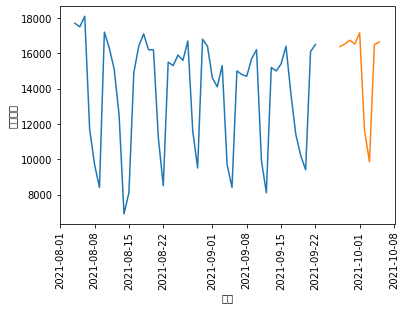

In [ ]:
model=sm.tsa.statespace.SARIMAX(df10['福岡天神'],exog=exog_fu[305:], order=(1,0,1), seasonal_order=(1,1,1,7))
fit = model.fit()
start = pd.to_datetime('2021-09-27 00:00:00')
end = pd.to_datetime('2021-10-05 00:00:00')
pred = fit.predict(start=start, end=end, exog=pred_exog_fu)
result.append(pred)
sns.lineplot(x='日付', y='福岡天神',data=df10[-50:])
sns.lineplot(data=pred)
plt.xticks(rotation=90)
pred

In [ ]:
results = np.array(result, dtype=int).T
results

array([[62155, 45732, 84639, 38834, 15620,  5966, 29994, 16585, 20404,
        16379],
       [63095, 46125, 84071, 38727, 15885,  5949, 30218, 16658, 19536,
        16533],
       [65021, 47311, 85221, 39591, 16121,  6098, 30617, 16792, 19667,
        16740],
       [64171, 46542, 84915, 39509, 16055,  5983, 30491, 16645, 19680,
        16527],
       [68374, 50461, 90068, 41052, 16816,  6342, 32222, 17340, 21140,
        17159],
       [59400, 44815, 54715, 22186, 14129,  5225, 27677, 11413, 16033,
        11624],
       [52925, 39750, 51541, 19544, 12953,  4413, 24797,  9301, 15084,
         9850],
       [61728, 45294, 84002, 38461, 15434,  5832, 29778, 16505, 20104,
        16489],
       [63225, 46017, 83881, 38561, 15793,  5912, 30213, 16602, 19709,
        16641]])

In [ ]:
evaluation = df[-10:]
evaluation.index

DatetimeIndex(['2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16',
               '2021-09-17', '2021-09-18', '2021-09-19', '2021-09-20',
               '2021-09-21', '2021-09-22'],
              dtype='datetime64[ns]', name='日付', freq=None)

In [ ]:
df_result = pd.DataFrame(results, index=evaluation.index[:-1])
new_index = ['2021/9/27','2021/9/28', '2021/9/29','2021/9/30', '2021/10/1', '2021/10/2', '2021/10/3','2021/10/4', '2021/10/5']
df_result = df_result.reindex(new_index)
df_result = pd.DataFrame(results, index=df_result.index)
df_result

,0,1,2,3,4,5,6,7,8,9
日付,,,,,,,,,,
2021/9/27,62155,45732,84639,38834,15620,5966,29994,16585,20404,16379
2021/9/28,63095,46125,84071,38727,15885,5949,30218,16658,19536,16533
2021/9/29,65021,47311,85221,39591,16121,6098,30617,16792,19667,16740
2021/9/30,64171,46542,84915,39509,16055,5983,30491,16645,19680,16527
2021/10/1,68374,50461,90068,41052,16816,6342,32222,17340,21140,17159
2021/10/2,59400,44815,54715,22186,14129,5225,27677,11413,16033,11624
2021/10/3,52925,39750,51541,19544,12953,4413,24797,9301,15084,9850
2021/10/4,61728,45294,84002,38461,15434,5832,29778,16505,20104,16489
2021/10/5,63225,46017,83881,38561,15793,5912,30213,16602,19709,16641


In [ ]:
df_result.to_csv("final1.csv", header=False, date_format="%Y/%-m/%-d")

1.加紧急事态

2。pdq调成（0，2）之间 

3。加新增人数 